### Erick Javier Matos Ramos IRD 5°A

# REGRESION LOGISTICA


C:\Users\ERICK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    gmat  gpa  work_experience
22   550  2.3                4
20   620  3.3                2
25   670  3.3                6
4    680  3.9                4
10   610  2.7                3
15   610  3.0                1
28   650  3.7                6
11   690  3.7                5
18   540  2.7                2
29   660  3.3                5
[1 0 1 1 1 0 1 1 0 1]
Accuracy (Precision):  0.8 %


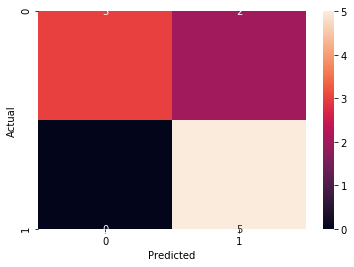

,gmat,gpa,work_experience,admited
0,780,4.0,3,1
1,750,3.8,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [81]:
#https://datatofish.com/logistic-regression-python/

#La base de datos del ejemplo es sobre si una persona es aceptada  o no en una universidad prestigiosa para
#seguir con sus estudios (ACEPTADA = 1, RECHAZADA = 0)
#Toman en cuenta 3 puntuajes (gmat,gpa,work experience)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/logisitca.csv')

#print (df)

X = df[['gmat', 'gpa','work_experience']] #Estos son los datos del csv, los cuales serviran para entrenar al modelo
y = df['admited']    

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) #utilizamos las funciones para entrenar al modelo
#proporcionandole los datos de X,Y, un tamaño de prueba de .25% por lo tanto solo hagarrara el 25% de los datos para pruebas
#y los demas los usara como datos de entrenamiento (75%) por lo tanto solo usara 10 datos para pruebas (40/0.25)

logistic_regression= LogisticRegression() #Usaremos el metodo de regresion logistica de sklearn
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) #creamos la matris de confusion 
sn.heatmap(confusion_matrix, annot=True)

print (X_test) #test dataset imprimimos los datos de prueba que son 10
print (y_pred) #imprimimos los predicted values que son los datos predecidos

print('Accuracy (Precision): ',metrics.accuracy_score(y_test, y_pred),'%') #Imprimimos la precicision 
plt.show()
df

TP = True Positives = 5
TN = True Negatives = 3
FP = False Positives = 2
FN = False Negatives = 0

# ARBOL DE DECISÓN

La prediccion fue:  [1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 1]
La precision fue de:  100.0


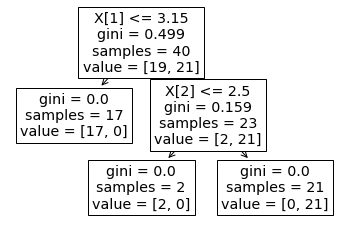

In [173]:
#https://pythonprogramminglanguage.com/decision-tree/

from sklearn import tree  #importamos de sklearn el modelo tree 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

df2 = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/logisitca.csv') #usamos el mismo csv

X = df2[['gmat', 'gpa','work_experience']] #Estos seran los datos de entrenamiento
Y = df2['admited']

clf = tree.DecisionTreeClassifier()     #Usamos el metodo de descision tree clasifier, en ves de logistic regresion de sklearn                                                                   

clf = clf.fit(X, Y)               #entrenamos los datos con fit                                              
prediction = clf.predict(df2[['gmat', 'gpa','work_experience']])  #le pasamos los datos que queremos predecir  
print('La prediccion fue: ',prediction) #imprima la predccion del dato que hemos ingresado

tree.plot_tree(clf) #imprimimos graficamente el arbol de decision

acc_clf = round(clf.score(X,Y) * 100, 2)
print("La precision fue de: ",acc_clf)#imprimimos la precision de la prediccion del dato o datos enviados

#como podemos observar para estos 40 datos, este modelo fue muy preciso, la pagina nos recomienda para ejemplos en la vida
#real tenemos mas datos para que se entrene mejor y a precision sea mas real 